# EE_8115_2 Electrical Engineering LAB

## STUDENT GROUP: [fill in, e.g. XX]

**Complete the following list of students of your group!**

* Student 1: Name, Mat. No.
* Student 2: Name, Mat. No.
* Student 3: Name, Mat. No. 


# Experiment 2 - Capacitor Charging/Discharging

Course: EE_8115 Physics: Mechanics, Electricity and Magentism - Part Electrical Engineering - Lab <br>
Rhein-Waal University of Applied Sciences (HSRW), Earth Observation Lab 


## Overview
---

The following lab exercise aims to profile the characteristic curve of a capacitor in discharging/charging states.

## Extra Software Needed

**Please download and install the [Arduino Legacy IDE](https://www.arduino.cc/en/software#legacy-ide-18x)**

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Arduino_Logo.svg/1024px-Arduino_Logo.svg.png" width="200px\"/>
    <br>
    <i></i>
</center>

## Background Preparation Before Starting the Lab
---

If you have not done yet, go to **[EEng Lab Course Preparation](https://github.com/rolfbecker/EE_8115_2_EEng_LAB_WS2024/tree/main/EEng_LAB_Course_Preparation)** to set up your Python work environment based on **Jupyter Lab**.


## Safety Considerations
---

- **DO NOT** energize **ANY** circuit without prior review by the lab assistants, thay will make sure that the circuit is correctly connected, and if not, the will point out the necessary corrections.
- **DO NOT** drop or hit **ANY** components, especially measuring instruments such as the multimeter, Luxmeter, etc.

## List of Equipment
---

**Make sure you have all the components and instruments listed below before you start**.

Components:
- x1 100uF Capacitor
- x1 10K Ohm Resistor
- x1 Arduino UNO with cable
- Set of jumper cables

Instruments:
- x1 Multimeter

## Circuit
---

The diagrams below show the test circuit you must make for this exercise.

<div style="display: flex;">
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
        <img src="./images/Capacitor_schem.png" width="400px"/>
        <br>
        <i></i>
      </center>
  </div>
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
    <img src="./images/Capacitor_bb.png" width="600px"/>
    <br>
    <i></i>
      </center>
  </div>
</div>

## Flashing Arduino UNO

1. Open the [Cap_Charging_Discharging_V003](./ex2/Arduino/Cap_Charging_Discharging_V003.ino) file that you can find in the `Arduino` folder of this exercise.

2. Open Arduino IDE and pase the code from [Cap_Charging_Discharging_V003](./ex2/Arduino/Cap_Charging_Discharging_V003.ino) into the editor.

<center>
    <img src="./images/arduino-open.png" width="400px"/>
    <br>
</center>

3. Select the right board, in this case Arduino Uno

<center>
    <img src="./images/arduino-select.png" width="400px"/>
    <br>
</center>

4. Select the corresponding port for your Arduino Uno.

<center>
    <img src="./images/arduino-port.png" width="400px"/>
    <br>
</center>

5. Flash the Arduino by uploading the code.

<center>
    <img src="./images/arduino-upload.png" width="400px"/>
    <br>
</center>

6. Verify that the code was uploaded correctly.

<center>
    <img src="./images/arduino-finish.png"/>
    <br>
</center>

## Data Capture
---

The data capture is done using Cap_Charging_Discharging_V003 `Arduino` code. 

1. Using **Serial Plotter** in Arduino IDE you can see the charge and discharge cycles of the capacitor.

<center>
    <img src="./images/arduino-plotter.png" width="400px"/>
    <br>
</center>

2. The next step to capture the data is to open the **Serial Monitor**.

<center>
    <img src="./images/arduino-monitor.png" width="400px"/>
    <br>
</center>

3. Let the Arduino circuit run for at least **2 cycle** of charging and discharging.

4. To copy the data, you can stop the serial monitor by checking the Autoscroll option.

<center>
    <img src="./images/arduino-autoscroll.png" width="400px"/>
    <br>
</center>

5. The data must be copied in a text file with extension `.txt` inside the `data` folder, please follow the format of the `charging_samples.txt` file inside the `data` folder.

**Use the following files for:**
- Charging part of the curve: [my_charging_data.txt](./data/my_charging_data.txt)
- Disharging part of the curve: [my_discharging_data.txt](./data/my_discharging_data.txt)

An example of how the file should be formatted:
<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">chargeMV,capacitorMV,digitalMV
5010,141,0
5010,288,0
5010,429,0
</code>

- The first column of data corresponds to the **Voltage Output** $mV_{out}$ measured in **millivolt**
- The second column is the **Voltage across Capacitor** $mV_{C}$ measured in **millivolt**
- The third colum is the **Voltage Input** $mV_{in}$ measured in **millivolt**,



## Data Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

**Fill requested information**:

In [2]:
############################
# Fill these variables with
# the requested information
############################

CHARGING_FILE = "charging_samples.txt"  # your file name WITH extension
DISCHARGING_FILE = "discharging_samples.txt"  # your file name WITH extension

In [3]:
CHARGING_PATH = f"./data/{CHARGING_FILE}"
DISCHARGING_PATH = f"./data/{DISCHARGING_FILE}"

df_charging = pd.read_csv(CHARGING_PATH)
df_discharging = pd.read_csv(DISCHARGING_PATH)
df_discharging.head()

,chargeMV,capacitorMV,digitalMV
0,0,4633,5000
1,0,4531,5000
2,0,4423,5000
3,0,4331,5000
4,0,4233,5000


## Numerical Analysis

In [4]:
# Capacitor voltage during charging
def V_charge(t, VS=1.0, R=1.e3, C=1.e-6):
    V = VS*(1-np.exp(-1/(R*C)*t))
    return V

In [5]:
# Capacitor voltage during discharging
def V_discharge(t, V0=1.0, R=1.e3, C=1.e-6):
    V = V0*np.exp(-1/(R*C)*t)
    return V

## Parameters

**Fill requested information**:

In [6]:
###################################
# Fill this session with your data
###################################

R = 10e3 # 10 kilo Ohm Resistor
C = 100e-6 # 100 micro Farad Capacitor

V0 = VS = 5.01 # Output voltage produced by the Arduino UNO

## Characteristic Time of Charging and Discharging

The product of resistance and capacitance has the unit of time. It is the characteristic time of the problem: 

$$
t_c = RC
$$

In [7]:
# characteristic time constant
tc = R*C # s

print(f"The chractericstic time: t_c = R*C = {tc:.3f} s")

The chractericstic time: t_c = R*C = 1.000 s


## Time Range for Evaluation

In [8]:
#times to evaluate the functions at
t = np.arange(len(df_charging.chargeMV))*20/1000 # s

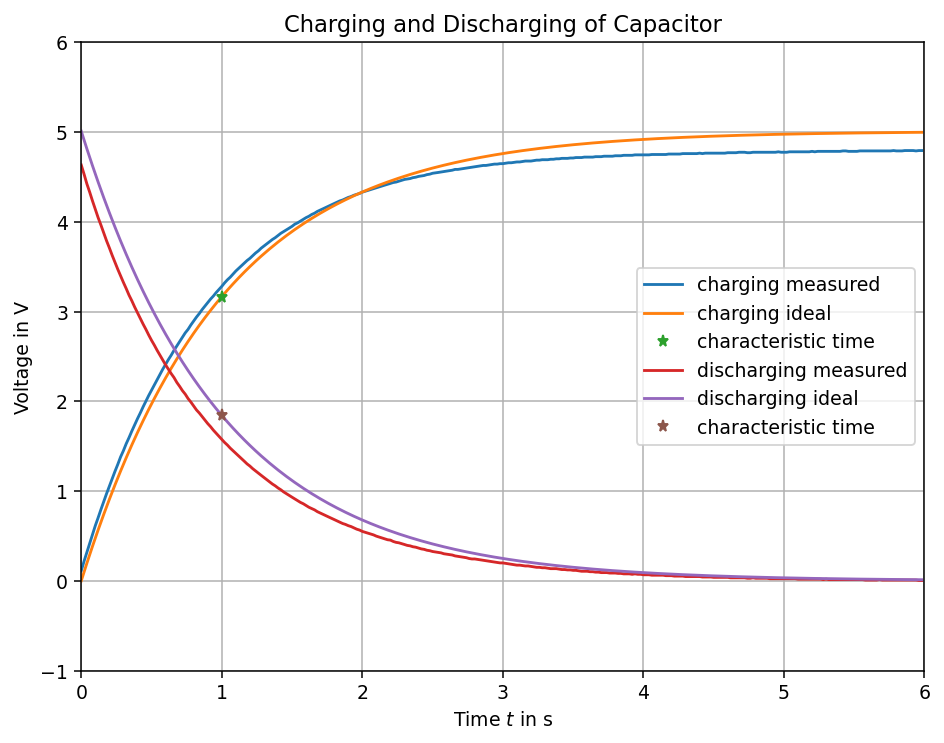

In [9]:
charging_V_C = df_charging.capacitorMV/1e3
discharging_V_C = df_discharging.capacitorMV/1e3

fig1, ax1 = plt.subplots(figsize=(8,6), dpi=136)
ax1.plot(t,charging_V_C, label="charging measured")
ax1.plot(t,V_charge(t,V0,R,C), label="charging ideal")
ax1.plot(tc,V_charge(tc,V0,R,C),"*", label ="characteristic time")

ax1.plot(t,discharging_V_C, label="discharging measured")
ax1.plot(t,V_discharge(t,V0,R,C), label="discharging ideal")
ax1.plot(tc,V_discharge(tc,V0,R,C),"*", label ="characteristic time")

ax1.set_xlabel("Time $t$ in s")
ax1.set_ylabel("Voltage in V")
ax1.set_title("Charging and Discharging of Capacitor")
ax1.set_xlim(0,6)
ax1.set_ylim(-1,6)
ax1.grid(True)
ax1.legend()
plt.plot()
plt.show()

## On a Log Scale

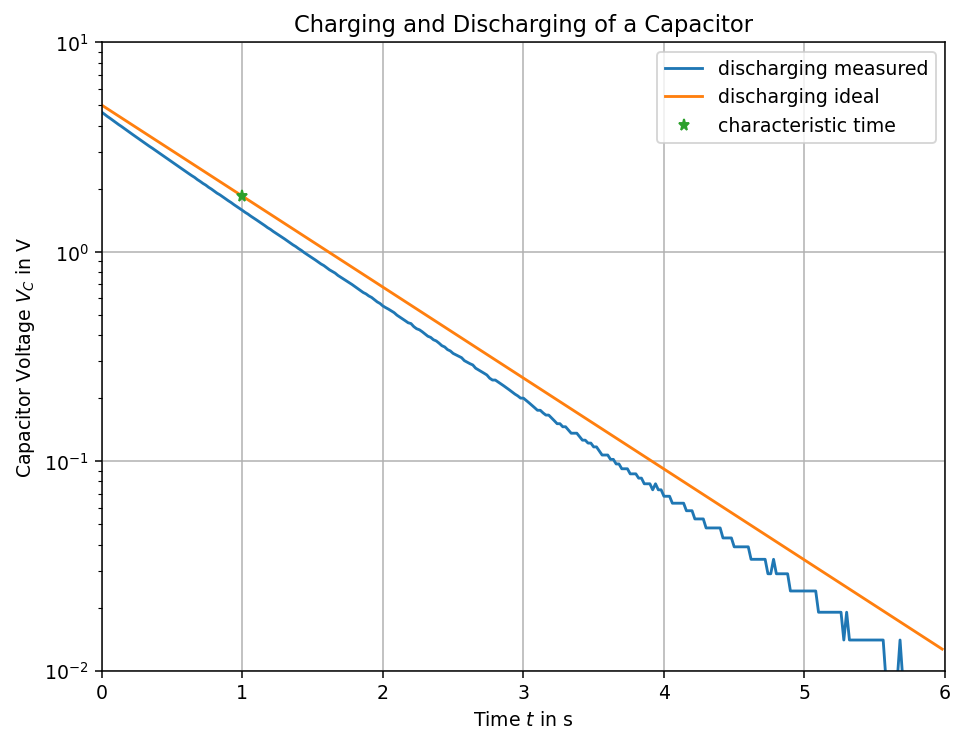

In [10]:
fig2, ax2 = plt.subplots(figsize=(8,6), dpi=136)

ax2.semilogy(t,discharging_V_C, label="discharging measured")
ax2.semilogy(t,V_discharge(t,V0,R,C), label="discharging ideal")
ax2.semilogy(tc,V_discharge(tc,V0,R,C),"*", label = "characteristic time")

ax2.set_xlabel("Time $t$ in s")
ax2.set_ylabel("Capacitor Voltage $V_C$ in V")
ax2.set_title("Charging and Discharging of a Capacitor")
ax2.set_xlim(0,6)
ax2.set_ylim(1e-2,1e1)
ax2.legend()
ax2.grid(True)
plt.plot()
plt.show()

In [11]:
def V_discharge_Model(t, V0=1.0, R=1.e3, C=1.e-6, m=-0.57, b=2.71e4):
    V = V0*np.exp(-1/(R*C)*t)
    return(b*V**m)

In [12]:
def plotter1(m=1., b=1.): # parameters with initial values

    fig2,ax2 = plt.subplots(figsize=(8,8))

    ax2.semilogy(t, discharging_V_C, "*")
    ax2.semilogy(t, V_discharge_Model(t,V0,R,C,m,b), "-")
    ax2.set_xlabel("Time $t$ in s")
    ax2.set_ylabel("Capacitor Voltage $V_C$ in V")
    ax2.set_title("Charging and Discharging of a Capacitor")
    ax2.set_xlim(0,6)
    ax2.set_ylim(1e-2,1e1)
    ax2.grid(True)

In [13]:
C*R

1.0

In [14]:
def V_discharge_Model2(t, V0=1.0, tc=1.0):
    V = V0*np.exp(-1/tc*t)
    return(V)

In [15]:
def plotter2(V0=1.0, tc=1.0): # parameters with initial values

    fig3,ax3 = plt.subplots(figsize=(8,8))

    ax3.semilogy(t, discharging_V_C, "*")
    ax3.semilogy(t, V_discharge_Model2(t,V0,tc), "-")
    ax3.set_xlabel("Time $t$ in s")
    ax3.set_ylabel("Capacitor Voltage $V_C$ in V")
    ax3.set_title("Charging and Discharging of a Capacitor")
    ax3.set_xlim(0,6)
    ax3.set_ylim(1e-2,1e1)
    ax3.grid(True)

In [16]:
# initialize the interactive plot
iplot2 = interactive(
    plotter2, 
    V0=(0.,10.,0.1),
    tc=(0.8,1.2,0.01),
)

# start the interactive plot
iplot2

interactive(children=(FloatSlider(value=1.0, description='V0', max=10.0), FloatSlider(value=1.0, description='…

## Questions

---
**Question 1:**<br>
Based on your measurements, what are the **slope (m)** and **y-intercept (b)** values that best fit your data on the log-plot?

**Answer 1:**<br>
your text ...

**Question 2:**<br>
How long is the characteristic charging and discharging time $\tau$ of the R-C-circuit  derived from your experiments? How is the time $\tau$ related to the the slope $m$ of the log-plot of the discharging curve? 

**Answer 2:** <br>
your text ...

---
**Question 3:**<br>
What is the capacitance of your capacitor **derived from your experiment / measurements? Compare with the nominal value of the capacitor you are using.

**Answer 3:** <br>
your text ...